<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest, chi2 

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


In [27]:
df = pd.read_csv("/content/drive/MyDrive/파이썬/train.csv", encoding = "cp949")
df = pd.DataFrame(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df = df.drop(["Cabin","Ticket", "Name"], axis =1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [30]:
df1=df["Age"].fillna(df["Age"].mean())

In [31]:
df["Age"] = df1

In [32]:
df.dropna(axis = 0,inplace = True)

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
X = df.drop(["Survived"], axis =1)
Y = df["Survived"]

In [10]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [36]:
X=X.replace("male",1).replace("female",0).replace("S",0).replace("C",1).replace("Q",2)

In [12]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
1,2,1,female,38.000000,1,0,71.2833,C
2,3,3,female,26.000000,0,0,7.9250,S
3,4,1,female,35.000000,1,0,53.1000,S
4,5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,S
887,888,1,female,19.000000,0,0,30.0000,S
888,889,3,female,29.699118,1,2,23.4500,S
889,890,1,male,26.000000,0,0,30.0000,C


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [38]:
smote = SMOTE(random_state=0)
X_train_over, Y_train_over = smote.fit_resample(X_train, Y_train)

In [39]:
print("orignal data %s" % Counter(Y))  #Y는 이탈여부
print("orignal train data %s" % Counter(Y_train))
print("over data %s" % Counter(Y_train_over))

orignal data Counter({0: 549, 1: 340})
orignal train data Counter({0: 392, 1: 230})
over data Counter({0: 392, 1: 392})


In [40]:
X_train, Y_train = X_train_over, Y_train_over

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
selector = SelectKBest()
selector.fit(X, Y)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

In [41]:
selector = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state=0), threshold= "median")
selector.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold='median')

In [42]:
score = pd.DataFrame()
#score["Chi2"] = selector.scores_
#score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,support,attribute
0,True,PassengerId
2,True,Sex
3,True,Age
6,True,Fare


In [ ]:
df.corr(method = 'spearman') #corr -상관관계 함수 (stats 함수안에 있음)

In [43]:
ct = ColumnTransformer([("scaling", StandardScaler(), ["Age", "Fare"]), 
                        ("onehot", OneHotEncoder(sparse = False), ["Sex"])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
X_train=pd.DataFrame(X_train)
X_train

In [44]:
logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train, Y_train)
Y_pred = logit.predict(X_test)

print("R2 : {:.3f}" .format(logit.score(X_train, Y_train)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)                       

R2 : 0.812
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       157
           1       0.74      0.68      0.71       110

    accuracy                           0.77       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267

[0.18330147]
[[-0.22318803  0.49072685  1.44405778 -1.44411675]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_test,Y_pred))

accuracy : 0.827
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       157
           1       0.70      0.72      0.71       110

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



In [69]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)

Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.828


ValueError: ignored

In [ ]:
pd.DataFrame(X_test)

In [51]:
df1 = pd.read_csv("/content/drive/MyDrive/파이썬/test.csv", encoding = "cp949")
df1 = pd.DataFrame(df1)
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
df1 = df1.drop(["Cabin","Ticket", "Name"], axis =1)
df1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [53]:
df1.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [55]:
df2=df1["Age"].fillna(df1["Age"].mean())

In [56]:
df1["Age"] = df2

In [57]:
df1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [58]:
df1.dropna(axis = 0,inplace = True)

In [59]:
df1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [60]:
df1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


In [63]:
df1=df1.replace("male",1).replace("female",0).replace("S",0).replace("C",1).replace("Q",2)


In [64]:
df1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,2
1,893,3,0,47.00000,1,0,7.0000,0
2,894,2,1,62.00000,0,0,9.6875,2
3,895,3,1,27.00000,0,0,8.6625,0
4,896,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,0
414,1306,1,0,39.00000,0,0,108.9000,1
415,1307,3,1,38.50000,0,0,7.2500,0
416,1308,3,1,30.27259,0,0,8.0500,0


In [65]:
ct = ColumnTransformer([("scaling", StandardScaler(), ["Age", "Fare"]), 
                        ("onehot", OneHotEncoder(sparse = False), ["Sex"])])
ct.fit(df1)
#X_train = ct.transform(X_train)
X_test = ct.transform(df1)

In [67]:
pd.DataFrame(X_test)

,0,1,2,3
0,0.342695,-0.497811,0.0,1.0
1,1.338924,-0.512660,1.0,0.0
2,2.534399,-0.464532,0.0,1.0
3,-0.255043,-0.482888,0.0,1.0
4,-0.653535,-0.417971,1.0,0.0
...,...,...,...,...
412,0.005777,-0.493856,0.0,1.0
413,0.701337,1.312180,1.0,0.0
414,0.661488,-0.508183,0.0,1.0
415,0.005777,-0.493856,0.0,1.0


In [70]:
df3 = pd.read_csv("/content/drive/MyDrive/파이썬/submission.csv", encoding = "cp949")
df3 = pd.DataFrame(df3)
df3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df3

In [71]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)

Y_pred = DT_model.predict(X_test)


In [72]:
Y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
#print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

In [87]:
dff = pd.read_csv("/content/drive/MyDrive/파이썬/test(x_test).csv", encoding = "cp949")
dff = pd.DataFrame(dff)
dff

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [88]:
dff = dff.drop(["Cabin","Ticket", "Name"], axis =1)
dff

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,0
414,1306,1,female,39.0,0,0,108.9000,C,1
415,1307,3,male,38.5,0,0,7.2500,S,0
416,1308,3,male,NaN,0,0,8.0500,S,0


In [89]:
dff.isnull().sum()


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Survived        0
dtype: int64

In [90]:
dff2=dff["Age"].fillna(dff["Age"].mean())


In [91]:
dff["Age"] = dff2


In [92]:
dff.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Survived       0
dtype: int64

In [93]:
dff.dropna(axis = 0,inplace = True)


In [94]:
dff

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.50000,0,0,7.8292,Q,0
1,893,3,female,47.00000,1,0,7.0000,S,1
2,894,2,male,62.00000,0,0,9.6875,Q,0
3,895,3,male,27.00000,0,0,8.6625,S,0
4,896,3,female,22.00000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S,0
414,1306,1,female,39.00000,0,0,108.9000,C,1
415,1307,3,male,38.50000,0,0,7.2500,S,0
416,1308,3,male,30.27259,0,0,8.0500,S,0


In [95]:
dff=dff.replace("male",1).replace("female",0).replace("S",0).replace("C",1).replace("Q",2)


In [105]:
dff

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.50000,0,0,7.8292,2,0
1,893,3,0,47.00000,1,0,7.0000,0,1
2,894,2,1,62.00000,0,0,9.6875,2,0
3,895,3,1,27.00000,0,0,8.6625,0,0
4,896,3,0,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,0,0
414,1306,1,0,39.00000,0,0,108.9000,1,1
415,1307,3,1,38.50000,0,0,7.2500,0,0
416,1308,3,1,30.27259,0,0,8.0500,0,0


In [106]:
column = dff["PassengerId"]

In [107]:
column

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 417, dtype: int64

In [97]:
Y_test = dff["Survived"]

In [98]:
ct = ColumnTransformer([("scaling", StandardScaler(), ["Age", "Fare"]), 
                        ("onehot", OneHotEncoder(sparse = False), ["Sex"])])
ct.fit(dff)
#X_train = ct.transform(X_train)
X_test = ct.transform(dff)

In [99]:
ypd.DataFrame(X_test)

,0,1,2,3
0,0.342695,-0.497811,0.0,1.0
1,1.338924,-0.512660,1.0,0.0
2,2.534399,-0.464532,0.0,1.0
3,-0.255043,-0.482888,0.0,1.0
4,-0.653535,-0.417971,1.0,0.0
...,...,...,...,...
412,0.005777,-0.493856,0.0,1.0
413,0.701337,1.312180,1.0,0.0
414,0.661488,-0.508183,0.0,1.0
415,0.005777,-0.493856,0.0,1.0


In [100]:
Y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64

In [101]:
from sklearn.tree import DecisionTreeClassifier


Y_pred = DT_model.predict(X_test)
#print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       265
           1       0.95      0.97      0.96       152

    accuracy                           0.97       417
   macro avg       0.97      0.97      0.97       417
weighted avg       0.97      0.97      0.97       417



In [109]:
Y_pred = pd.DataFrame(Y_pred)

In [110]:
Y_pred["PassengerId"] = column

In [111]:
Y_pred

,0,PassengerId
0,0,892.0
1,1,893.0
2,0,894.0
3,0,895.0
4,1,896.0
...,...,...
412,0,1304.0
413,1,1305.0
414,0,1306.0
415,0,1307.0


In [ ]:
Y_pred1 = Y_pred[0]

----------- plot grow----------- 


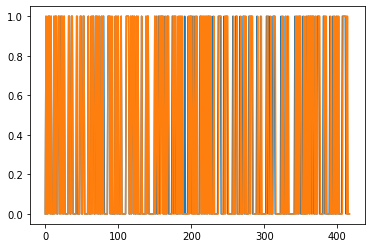

In [104]:
import matplotlib.pyplot as plt

print("----------- plot grow----------- ")
%matplotlib Inline
plt.plot(Y_pred)
plt.plot(Y_test)

In [62]:
X_train

array([[ 0.01585956,  0.05800885,  0.        ,  1.        ],
       [-1.34309747, -0.4481109 ,  0.        ,  1.        ],
       [ 0.01585956, -0.37958812,  1.        ,  0.        ],
       ...,
       [-1.50370867, -0.49343466,  1.        ,  0.        ],
       [-0.94856402, -0.51885636,  1.        ,  0.        ],
       [-0.52252207,  0.0914481 ,  1.        ,  0.        ]])

In [ ]:
feature_name = X_train.columns
feature_importance = DT_model.feature_importances_
sorted(zip(feature_importance,feature_name), reverse = True)

In [ ]:
X_train

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model, out_file="tree.dot", class_names=["비이탈", "이탈"],
                feature_names = feature_name, impurity=True, filled = True)

#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
